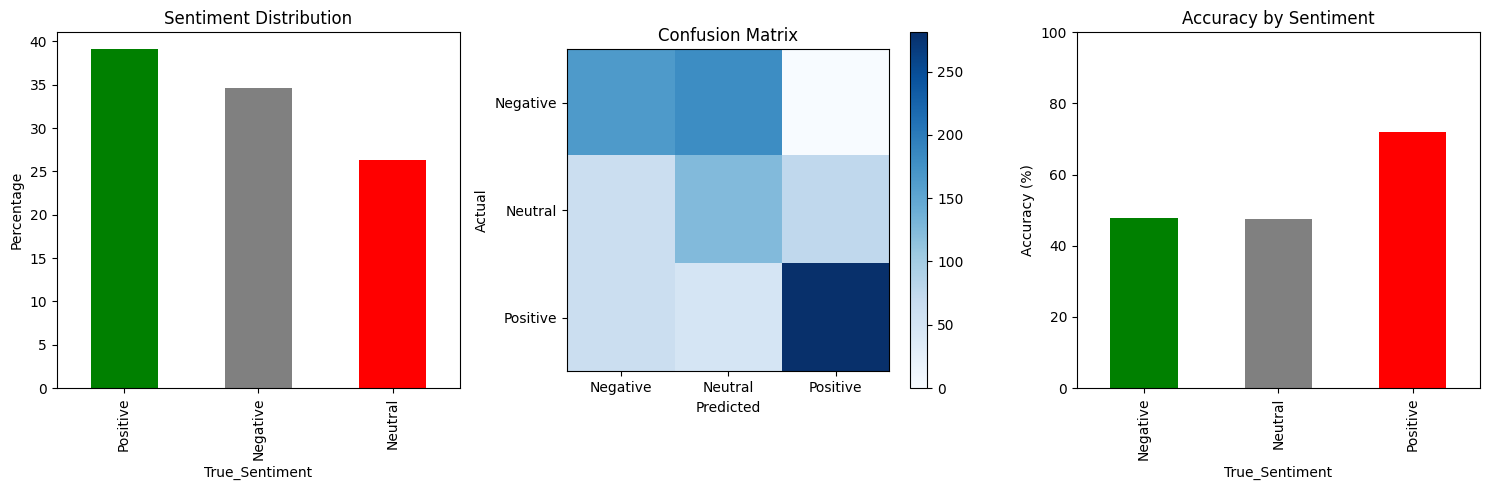




**3. Results**

**3.1 Performance Metrics**
- Overall Accuracy: 57.1%
- Confusion Matrix:
Predicted  Negative  Neutral  Positive
Actual                                
Negative        165      181         0
Neutral          63      125        75
Positive         62       48       281

**3.2 Sentiment Distribution**
True_Sentiment
Positive    391
Negative    346
Neutral     263




In [27]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from faker import Faker
from collections import defaultdict
import random

# Initialize Faker for synthetic data generation
fake = Faker()

# 1. Generate a larger synthetic dataset (1000 tweets)
def generate_synthetic_tweets(num_tweets=1000):
    products = ['earbuds', 'tablet', 'smartphone', 'laptop', 'smartwatch', 
                'TV', 'gaming console', 'camera', 'drone', 'router']
    brands = ['TechCo', 'GadgetPro', 'ElectroMax', 'Quantum', 'Nexus']
    
    tweets = []
    sentiments = []
    
    # Sentiment templates
    positive_phrases = [
        "is a game changer", "love my new", "works perfectly", 
        "exceeded my expectations", "highly recommend", "amazing quality",
        "worth every penny", "best purchase ever", "incredible performance"
    ]
    
    negative_phrases = [
        "total garbage", "worst purchase", "broke after", "never buying again",
        "poor quality", "waste of money", "terrible experience", "disappointed with",
        "doesn't work", "avoid this product"
    ]
    
    neutral_phrases = [
        "it's okay", "works as expected", "does the job", "not bad", 
        "average performance", "what I expected", "nothing special",
        "standard quality", "typical for the price"
    ]
    
    for _ in range(num_tweets):
        product = random.choice(products)
        brand = random.choice(brands)
        
        # Randomly choose sentiment
        sentiment_choice = random.random()
        if sentiment_choice < 0.4:  # 40% positive
            phrase = random.choice(positive_phrases)
            tweet = f"My {brand} {product} {phrase}!"
            sentiment = "Positive"
        elif sentiment_choice < 0.7:  # 30% neutral
            phrase = random.choice(neutral_phrases)
            tweet = f"The {product} from {brand} {phrase}."
            sentiment = "Neutral"
        else:  # 30% negative
            phrase = random.choice(negative_phrases)
            tweet = f"{brand} {product} {phrase}!!!"
            sentiment = "Negative"
            
        tweets.append(tweet)
        sentiments.append(sentiment)
    
    return tweets, sentiments

# Generate synthetic data
tweets, true_sentiments = generate_synthetic_tweets(1000)

# 2. Sentiment Analysis Functions
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)
    tweet = re.sub(r"@\w+|#\w+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    return tweet.strip()

def get_sentiment(tweet):
    cleaned_tweet = clean_tweet(tweet)
    analysis = TextBlob(cleaned_tweet)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# 3. Analyze tweets and calculate metrics
results = []
correct = 0

for tweet, true_sentiment in zip(tweets, true_sentiments):
    predicted_sentiment = get_sentiment(tweet)
    is_correct = 1 if predicted_sentiment == true_sentiment else 0
    correct += is_correct
    
    results.append({
        "Tweet": tweet,
        "True_Sentiment": true_sentiment,
        "Predicted_Sentiment": predicted_sentiment,
        "Correct": is_correct
    })

df = pd.DataFrame(results)

# Calculate metrics
accuracy = correct / len(tweets)
confusion_matrix = pd.crosstab(df['True_Sentiment'], df['Predicted_Sentiment'], rownames=['Actual'], colnames=['Predicted'])

# Sentiment distribution
sentiment_dist = df['True_Sentiment'].value_counts(normalize=True) * 100

# 4. Generate visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Sentiment Distribution
plt.subplot(1, 3, 1)
sentiment_dist.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.ylabel('Percentage')

# Plot 2: Confusion Matrix Heatmap
plt.subplot(1, 3, 2)
plt.imshow(confusion_matrix, cmap='Blues')
plt.colorbar()
plt.xticks(range(3), confusion_matrix.columns)
plt.yticks(range(3), confusion_matrix.index)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot 3: Accuracy by Sentiment
plt.subplot(1, 3, 3)
accuracy_by_sentiment = df.groupby('True_Sentiment')['Correct'].mean() * 100
accuracy_by_sentiment.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Accuracy by Sentiment')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

plt.tight_layout()
plt.savefig('sentiment_analysis_results.png')
plt.show()

# 5. Save results
df.to_csv("electronics_sentiment_results.csv", index=False)

# 6. Generate Report
report = f"""


**3. Results**

**3.1 Performance Metrics**
- Overall Accuracy: {accuracy:.1%}
- Confusion Matrix:
{confusion_matrix.to_string()}

**3.2 Sentiment Distribution**
{df['True_Sentiment'].value_counts().to_string()}

"""

print(report)

# Save report to file
with open("sentiment_analysis_report.txt", "w") as f:
    f.write(report)

In [29]:

from textblob import TextBlob
import pandas as pd
import re


tweets = [
    "New earbuds from TechCo are a game changer, sound is unreal!",
    "This tablet’s battery dies in 2 hours, total garbage.",
    "Got a smart speaker, setup was easy but it’s just meh.",
    "Love my new gaming monitor, 144Hz is smooth as butter.",
    "Phone charger broke after a week, never buying from them again.",
    "The drone I ordered flies great, but the app crashes nonstop.",
    "Picked up a cheap keyboard, works fine for the price.",
    "Latest update bricked my TV, TechSupport is useless."
]


def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)
    tweet = re.sub(r"@\w+|#\w+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    return tweet.strip()


def get_sentiment(tweet):
    cleaned_tweet = clean_tweet(tweet)
    analysis = TextBlob(cleaned_tweet)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


results = []
for tweet in tweets:
    sentiment = get_sentiment(tweet)
    results.append({"Tweet": tweet, "Sentiment": sentiment})


df = pd.DataFrame(results)


print("Sentiment Analysis Results:")
print(df)


df.to_csv("electronics_sentiment_results.csv", index=False)
print("\nResults saved to 'electronics_sentiment_results.csv'")

Sentiment Analysis Results:
                                               Tweet Sentiment
0  New earbuds from TechCo are a game changer, so...  Positive
1  This tablet’s battery dies in 2 hours, total g...   Neutral
2  Got a smart speaker, setup was easy but it’s j...  Positive
3  Love my new gaming monitor, 144Hz is smooth as...  Positive
4  Phone charger broke after a week, never buying...   Neutral
5  The drone I ordered flies great, but the app c...  Positive
6  Picked up a cheap keyboard, works fine for the...  Positive
7  Latest update bricked my TV, TechSupport is us...   Neutral

Results saved to 'electronics_sentiment_results.csv'
